In [1]:
#boilerplate install and import
!pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()

from fastai.vision.widgets import *

In [2]:
#DANIEL'S AZURE KEY!!!!!!
key = os.environ.get('AZURE_SEARCH_KEY', '87106c462b7f47f4ae24e13ff802d458')

In [6]:
#hehe
!del balls

Could Not Find d:\Programming\Machine Learning\CS356\cs356notebooks\balls


In [7]:
#search bing for these types of balls, download and put in 'balls' directory and balltype subdir
ball_types = 'baseball', 'soccer', 'basketball'
path = Path('balls')

path.mkdir()
for o in ball_types:
    print(o)
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} ball', max_images=50)
    download_images(dest, urls=results.attrgot('contentUrl'))

baseball
soccer
basketball


In [12]:
#List(L) of paths to ball images
fns = get_image_files(path)

(#116) [Path('balls/baseball/00000001.jpg'),Path('balls/baseball/00000002.jpg'),Path('balls/baseball/00000003.jpg'),Path('balls/baseball/00000004.jpeg'),Path('balls/baseball/00000005.jpg'),Path('balls/baseball/00000006.png'),Path('balls/baseball/00000007.jpg'),Path('balls/baseball/00000008.jpg'),Path('balls/baseball/00000009.jpg'),Path('balls/baseball/00000011.jpg')...]

In [9]:
#check for failed downloads
failed = verify_images(fns)
failed

(#0) []

In [10]:
#ditch failed downloads
failed.map(Path.unlink)

(#0) []

In [11]:
#create a dataset from photos, use parent folder title as label
balls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128)])

In [14]:
#into dataloader
dls = balls.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


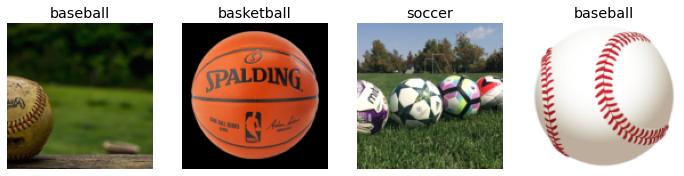

In [15]:
#preview
dls.valid.show_batch(max_n=4, nrows=1)

In [16]:
#setup learner with resnet18 and dataloader
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [34]:
#send it through a fine-tune cycle
learn.fine_tune(25)

epoch,train_loss,valid_loss,error_rate,time
0,1.708953,1.619364,0.565217,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.623367,1.183857,0.391304,00:07
1,1.426718,0.828853,0.260870,00:07
2,1.214021,0.534277,0.217391,00:07
3,1.093239,0.299517,0.130435,00:07
4,0.932674,0.154147,0.086957,00:07
5,0.802186,0.078873,0.043478,00:07
6,0.693840,0.047201,0.000000,00:07
7,0.608890,0.030335,0.000000,00:07
8,0.540058,0.018372,0.000000,00:07
9,0.482002,0.013525,0.000000,00:07


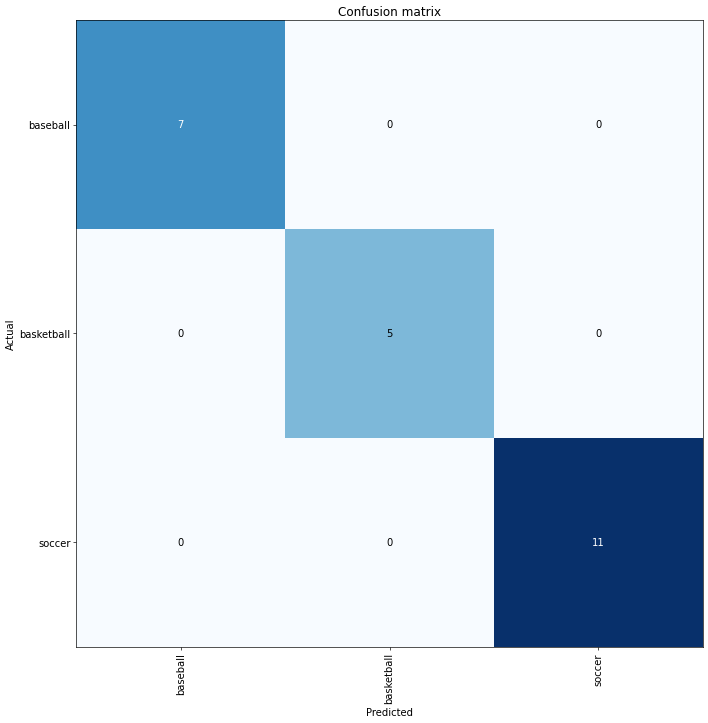

In [35]:
#take a look at the confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [19]:
#run the image cleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [20]:
#who cleans the cleaners?
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
#zip it - windows style
!tar -cvzf balls.zip "balls" 

# Q and A

## How well does it work?
> The small size of the data set makes for an interesting situation, it only took 7 epochs to achieve 0% error, which is insanity. Training loss continued to drop as well, though after 20 epochs, the validation loss appeared to be climbing, which may suggest the model is overfitting. It really goes to show what a great job was done on ResNet, because it works great out of the box.